https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification/overview

## Unintended Bias in Toxicity Classification

### 1. Introduction

The social media landscape today shows the profound effects digital communication has had on the way we, as a society, converse and interact with eacother. This has not always been a positive thing. Studies have shown [2][3] significant amounts of toxic behaviour online where people can often hide in anonymity and abuse others.This is a significant challenge that all social media companies, and users are aware of and need to combat. Natural language processing allows us to classify text based on toxicity and potential then we are able to detect and remove this harmful content.

Sadly, there have been lots of high-profile instances of online toxicity causing real world harm, showing the urgent need for effective detection and mitigation strategies. For example, the 2020 Cyberbullying of Hana Kimura, a Japanese professional wrestler and reality TV star, where she faced a huge amount of hateful and toxic comments on social media platforms, leading to her tragic suicide. [4] Events like these have definitely increased public debate and led to calls for more stringent moderation policies on social media platforms. There are of course complex challenges faced in distinguishing between harmful content and free speech, and the critical role that advanced NLP techniques can play in addressing these issues.

This topic also ties in with complexities around freedom of speech and censorship as well as mental health and the psycological effects of toxicity online. It is important to also consider that misclassification may supress what is legitimate free expression. It is also important to note that toxic comments may appear as a result of mistake or ignorance by the user, not all toxicity will be purposeful in causing harm. These may cause subtle differences in the language used. Due to lunguistic nuances, slang, slurs and contextual differences, these comments can be incredibly hard to accurately and consistently detect. Therefore the need to improve these detection tools is of pressing concern to the population today.

### 2. Description of Selected Dataset

The dataset selected for this project is the "Jigsaw Unintended Bias in Toxicity Classification" dataset from Kaggle. [1] This dataset was created by Jigsaw to allow people to experiement with building models to better understand the use of toxic language and the bias users might bring to predicting this language. The data set contains a large amount of comments from online platforms which have been labelled according to their toxicity. There are over 1.8million comments in this dataset and the comment labels score between 0 (non-toxic) to 1 (highly toxic), this ensures we can understand the degree of toxicity to a nuanced level. For the purpose of this task however, we will split the data into 0-0.5 as non toxic and 0.5-1 as toxic. There are also other attributes to each comment such as race, gender and sexual orientation.These are added when the comment mentions something with respect to one of those identities. This is used to then measure if there is bias in the models. If we have capacity, we will try to evaluate our models using this at the end. The size and diversity of the dataset make it a valuable resource for developing more fair, unbiased, and effective toxicity classification models. In an increasingly polarised world we need to work together to ensure people stay safe online in a fair and unbiased way.

The data was sourced from the Civil Comments platform, and comprises comments from various English-language news sites during 2015-2017 which were made publicly available for research post the platform's closure. The labelling of the dataset was conducted via Figure Eight’s crowd rating platform, which ensured a high standard of label accuracy and reliability. This process included test questions to maintain quality control among raters, addressing the subjective nature of toxicity and identity perception.

### 3. Objectives of the Project
This project aims to develop an NLP model which will classify the comments into toxic and non toxic, without bias. We will also aim to reduce any unintended bias in the toxicity classifier. At the end of the project we will use the other labels such as gender and ethnidcity to ensure the model doesnt unjustly over or undercategorise these areas. We will seek to explore the effectiveness in our machine learning tools to achieve this and experiement to find the best way to predict on large, unstructed text such as social media comments. Hopefully we will find a solution that not only contributes to the NLP field but also addresses a significant social issue. By understanding limitations and which are the better NLP classifiers to use, this project aims to reduce the prevalence of harmful content in online spaces, thereby contributing to healthier, more constructive digital interactions. A key goal is to support mental health initiatives by limiting exposure to damaging content, particularly in vulnerable groups.

Although we acknowledge the simplicity of some tools used here, we hope to use this first project as a stepping stong to more complex and cutting edge tools like BERT, should the computational capacity be there. We face limtitations with computational capacity through this project, which is a useful limitation to bear in mind for future projects.



In [ ]:
#imports
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer


# Downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 1. Importing the data

First we need to mount the Google Drive and import the data. We have listed out the files to inspect and check we are in the right directory.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to folder in Google Drive
folder_path = '/content/drive/MyDrive/MSc/NaturalLanguageProcessing/unintended_bias'

# List all files in the folder
all_files = os.listdir(folder_path)
all_files


Mounted at /content/drive


['all_data.csv',
 'identity_individual_annotations.csv',
 'test.csv',
 'sample_submission.csv',
 'test_private_expanded.csv',
 'test_public_expanded.csv',
 'toxicity_individual_annotations.csv',
 'train.csv']

In [ ]:
# constructing file paths
train_file_path = os.path.join(folder_path, 'train.csv')
test_file_path = os.path.join(folder_path, 'test_private_expanded.csv')



train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [ ]:
# Getting the columns from each dataset
train_columns = train_data.columns
test_columns = test_data.columns

# Printing the columns
print("Train Data Columns:", train_columns)
print("Test Data Columns:", test_columns)

Train Data Columns: Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')
Test Data Columns: Index(['id', 'comment_text', 'created_date', 'publication_id', 'parent_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'toxicity', 'sev

# 2. Test Train split

As the data was already split when loaded, we just need to upload the test and trin into its own variable.

In [ ]:
X_train_full = train_data.copy()
X_test_full = test_data.copy()


In [ ]:

X_train = X_train_full[['id','comment_text']]
y_train = train_data['target']
X_test = X_test_full[['id','comment_text']]
y_test = test_data['toxicity']


In [ ]:
X_train = X_train.sample(frac=0.01, random_state=1)
y_train = y_train.sample(frac=0.01, random_state=1)
X_test = X_test.sample(frac=1, random_state=1)
y_test = y_test.sample(frac=1, random_state=1)

# 3. Balancing the Dataset

We converted the target variable from a continuous variable into a categorical variable of Toxic and Not Toxic. From initial analysis we can see the dataset is very imbalenced. We therefore decided to use sampling of the data to balence the datasets.

In [ ]:
# Getting Some Basic Descriptive Statistics
print(y_train.describe())

# Counting of unique values
print(y_train.value_counts())


count    18049.000000
mean         0.102229
std          0.196234
min          0.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: target, dtype: float64
0.000000    12646
0.166667     1397
0.200000     1103
0.300000      573
0.400000      479
            ...  
0.647059        1
0.633333        1
0.770492        1
0.386667        1
0.823529        1
Name: target, Length: 472, dtype: int64


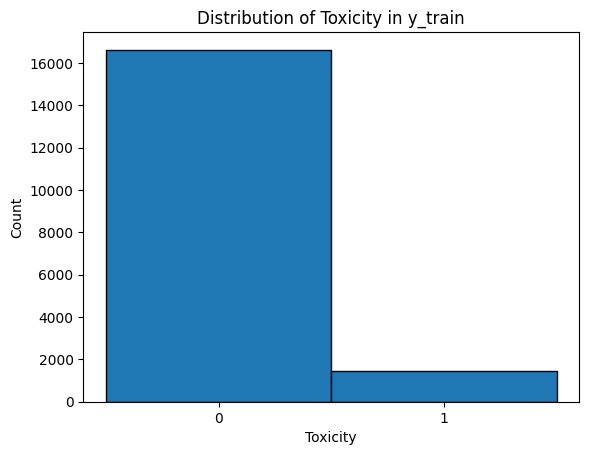

In [ ]:
# Plotting a histogram to check Balencing of datasets
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title('Distribution of Toxicity in y_train')
plt.show()




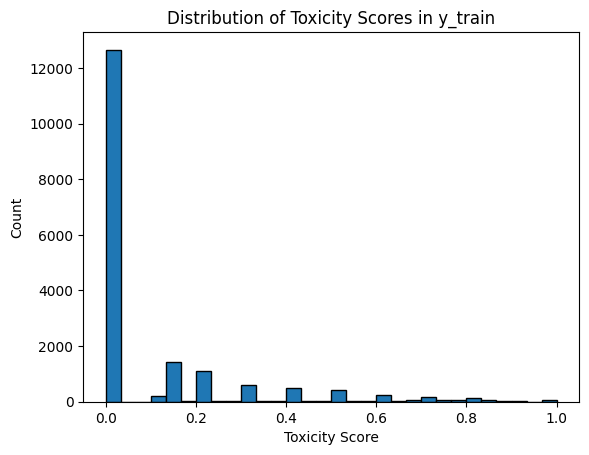

False    16620
True      1429
Name: target, dtype: int64


In [ ]:
# Plotting the distribution of toxiciyty on a granular level
plt.hist(y_train, bins=30, edgecolor='black')
plt.xlabel('Toxicity Score')
plt.ylabel('Count')
plt.title('Distribution of Toxicity Scores in y_train')
plt.show()

threshold = 0.5
binary_labels = y_train >= threshold
print(binary_labels.value_counts())


In [ ]:

# Converting the targets to binary (toxic or non-toxic) based on 0.5-1 being toxic
y_train_binary = y_train >= 0.5

# Count the number of samples in the minority class
n_toxic = y_train_binary.sum()

# Now we need to sample an equal number of non-toxic comments
non_toxic_samples = X_train[~y_train_binary].sample(n=n_toxic, random_state=1)
toxic_samples = X_train[y_train_binary]

# Combineing  the two sets to create a balanced dataset
X_train = pd.concat([non_toxic_samples, toxic_samples])
y_train = y_train_binary[X_train.index]

# Now balanced_X_train and balanced_y_train have an equal number of toxic and non-toxic comments


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


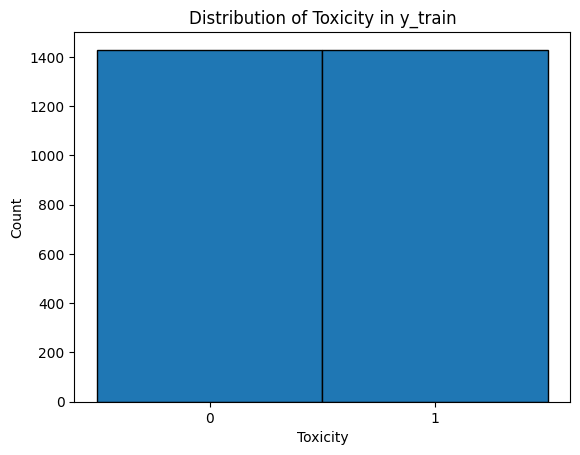

In [ ]:
# Showing the balened dataset
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.title('Distribution of Toxicity in y_train')
plt.show()

Although the dataset is now balenced, we now have a much smalller training dataset which could be a drawback. For future studies we could implement other dataset balencing techniques such as SMOTE. Or instead we could have used oversampling instead of undersampling. We chose undersampling as, due to computational constraints, our processing power is not very good so for efficiencies it made sense to use less data.

# 4. Cleaning the text

To clean the text we followed this process:
1.   Remove Stop words from the text - this reduces the size of the data for efficiency as well as taking away words which are likely to not contrivute to context.
2.   Tokenise - this splits the text into words
3.   Lemmatise - This is grouping together different inflected forms of the same words
4. Vectorisation - This is needed to convert the text into numerical vectors

For vectorisation we decided to experiment with two types - Word2Vec and TF-IDF.

Word2Vec is used to create word embeddings which are vector representation of words. These can be used to find the contextual relationships between words. Once trained it can detect synonymous words and the semantic meaning of words.

TF-IDF i a statistical measure used to evaluate the importance of a word in a document. it calculates the frequency of a word and adjusts it for the word frequency across the entire corpus to help us understand the relative frequency of a word.

It will be interesting to compare the results of the two vectorising methods. Toxic comments are not always straightforward to clasify, they can often be sarcastic or subtly offensive. Word2Vec's ability to understand context and semantics might make it more effective in identifying such complex cases.
TF-IDF might struggle with sarcasm or subtlety since it relies more on the frequency of words than their meaning in context. We will also be able to judge the scalability and computational efficiency of each method. Word2Vec generally requires more computational resources for training, whereas TF-IDF is simpler and faster to compute. This aspect is crucial for real-world applications where resources and efficiency matter.


In [ ]:
stop_words = set(stopwords.words('english'))

# lemmatising
lemmatizer = WordNetLemmatizer()

# precompiled regex
non_alpha_re = re.compile(r'[^a-zA-Z]')

def clean_text(text):
    """
    Function to clean the text by removing non-alphabetic characters,
    converting to lowercase, and lemmatizing each word.
    Returns a list of tokens.
    """
    # Removing non characters
    text = non_alpha_re.sub(' ', str(text)).lower()

    # Tokenising
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return clean_tokens

In [ ]:
# Apply the cleaning function
X_train['comment_text'] = X_train['comment_text'].apply(clean_text)
X_test['comment_text'] = X_test['comment_text'].apply(clean_text)

In [ ]:
# For Word2Vec
X_train_w2v = X_train.copy()
X_test_w2v = X_test.copy()

# For TF-IDF, joining the tokens back into a string
X_train_tfidf = X_train.copy()
X_train_tfidf['comment_text'] = X_train_tfidf['comment_text'].apply(' '.join)

X_test_tfidf = X_test.copy()
X_test_tfidf['comment_text'] = X_test_tfidf['comment_text'].apply(' '.join)

In [ ]:
print(X_train_w2v.shape)
print(len(y_train))


(2858, 2)
2858


## 5. Establising a baseline performance

Before we look at more complex methods, we will first look at using a Logistic Regression method on both the TFIDF and Word2Vec to get a baseline performance for this classification which we can then build on.
-- ad why Logistic reg?

## Metrics used to evaluate Models

To evaluate the effectiveness of the classifiers, a multifaceted approach will be used, with metrics that collectively ensure a comprehensive assessment. Precision is most important to us in this context, as it measures the model's ability to correctly identify toxic comments while minimising the misclassification of non-toxic comments, this crucial factor in maintaining user trust and engagement. Similarly, recall is also a very useful measure, indicating the model's success in capturing the majority of toxic content which is an essential aspect of effective moderation.

These metrics will be applied through the analysis of a confusion matrix, providing a clear visualization of the classifier’s performance, including its true positive and false positive rates. We will produce confusion matrices for each run as well as investigating the F1 score, which harmonizes precision and recall, offering a balanced view of the model's overall accuracy.

### 5.1 First I will apply TFIDF Vectorisation

In [ ]:
X_train_tfidf['comment_text'] = X_train_tfidf['comment_text'].fillna('')

X_test_tfidf['comment_text'] = X_test_tfidf['comment_text'].fillna('')

In [ ]:
#X_train_cleaned.head()
nan_count_total = X_train_tfidf.isna().sum().sum()
nan_count_total

0

### Now we will train the baseline logistic regression model using TF-IDF

In [ ]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_tfidf['comment_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_tfidf['comment_text'])

Here I increased the max_iter as it was it was not converging with only 100


In [ ]:
# Binarising target variable
y_train_binary = np.where(y_train >= 0.5, 1, 0)
y_test_binary = np.where(y_test >= 0.5, 1, 0)

# Classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train_binary)

# Predictions
y_pred_lr = classifier.predict(X_test_tfidf)

X_test_full['lr_pred'] = y_pred_lr

# Evaluations
accuracy_lr = accuracy_score(y_test_binary, y_pred_lr)
precision_lr = precision_score(y_test_binary, y_pred_lr)
recall_lr = recall_score(y_test_binary, y_pred_lr)
f1_lr = f1_score(y_test_binary, y_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Accuracy: 0.7923962186600905
Precision: 0.23571945046999276
Recall: 0.7126141185547126
F1 Score: 0.35425722321656866


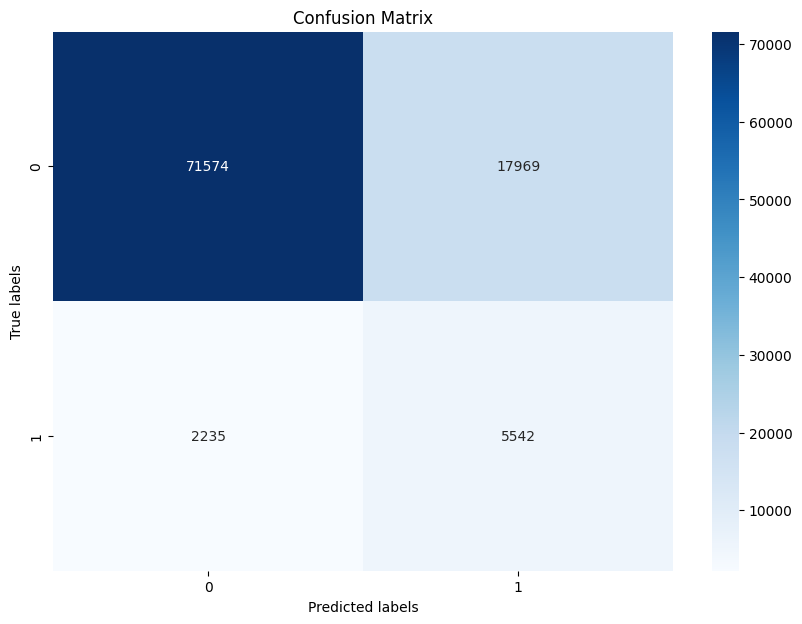

In [ ]:
conf_matrix_tfidf_lr = confusion_matrix(y_test_binary, y_pred_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tfidf_lr, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_tfidf_lr

array([[71574, 17969],
       [ 2235,  5542]])

This model has a relatively high number of false positives, indicating it may be overpredicting toxicity. However, it also has a good number of true positives.

## 5.2 Now applying word2vec to the comments

In [ ]:
# using word2vec model from the web

model_path = 'word2vec-google-news-300.vectors.npy'
if not os.path.exists(model_path):
    import gensim.downloader as api
    w2v_model = api.load('word2vec-google-news-300')
    w2v_model.save(model_path)
else:
    from gensim.models import KeyedVectors
    w2v_model = KeyedVectors.load(model_path)

from gensim.models import KeyedVectors

# Load the model, specify binary=True
#w2v_model = KeyedVectors.load_word2vec_format('word2vec-google-news-300.vectors.npy', binary=True)


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def document_vector(word2vec_model, doc):
    # removing words not in wor2vec model
    doc = [word for word in doc if word in word2vec_model.key_to_index]
    if len(doc) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model[doc], axis=0)

def vectorize_in_batches(texts, word2vec_model, batch_size=1000):
    batch = []
    for doc in texts:
        batch.append(doc)
        if len(batch) == batch_size:
            yield np.array([document_vector(word2vec_model, doc) for doc in batch])
            batch = []
    if batch:
        yield np.array([document_vector(word2vec_model, doc) for doc in batch])

batch_size = 1000
vectors = []
for batch_vectors in vectorize_in_batches(X_train_w2v['comment_text'], w2v_model, batch_size):
    vectors.append(batch_vectors)
X_train_vectorized = np.vstack(vectors)

# now for test data
vectors = []
for batch_vectors in vectorize_in_batches(X_test_w2v['comment_text'], w2v_model, batch_size):
    vectors.append(batch_vectors)
X_test_vectorized = np.vstack(vectors)

In [ ]:
print(X_train_vectorized.shape)
print(len(y_train_binary))

(2858, 300)
2858


### Here we now apply baseline Logistic regression to the Word2Vec comments

In [ ]:
# W2V log Classifier
w2v_classifier = LogisticRegression(max_iter=1000)

# Training the classifier
w2v_classifier.fit(X_train_vectorized, y_train_binary)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred_w2v_lr = w2v_classifier.predict(X_test_vectorized)

X_test_full['w2v_lr_pred'] = y_pred_w2v_lr

# Evaluations
accuracy_w2v_lr = accuracy_score(y_test_binary, y_pred_w2v_lr)
precision_w2v_lr = precision_score(y_test_binary, y_pred_w2v_lr)
recall_w2v_lr = recall_score(y_test_binary, y_pred_w2v_lr)
f1_w2v_lr = f1_score(y_test_binary, y_pred_w2v_lr)

print(f"Word2Vec Model Performance:")
print(f"Accuracy: {accuracy_w2v_lr}")
print(f"Precision: {precision_w2v_lr}")
print(f"Recall: {recall_w2v_lr}")
print(f"F1 Score: {f1_w2v_lr}")


Word2Vec Model Performance:
Accuracy: 0.7828709412248254
Precision: 0.23163183279742766
Recall: 0.7410312459817411
F1 Score: 0.3529411764705882


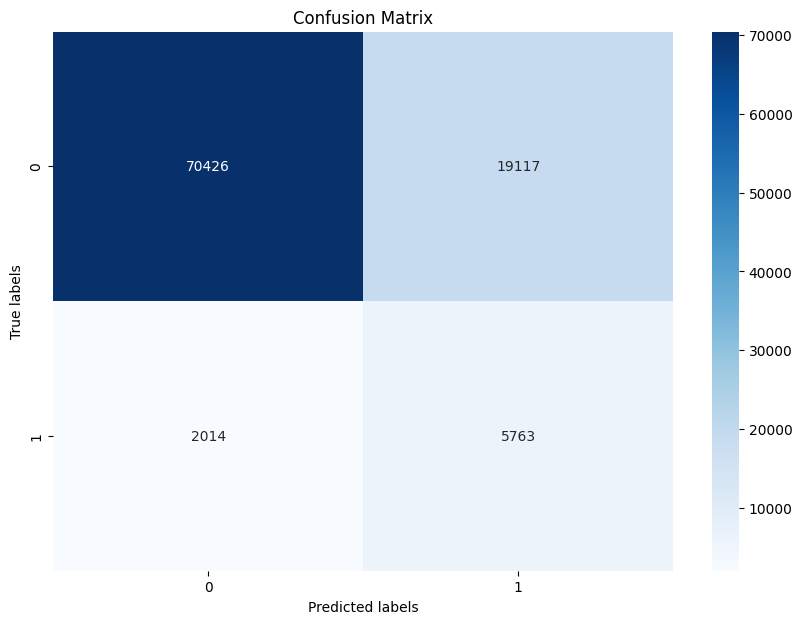

In [ ]:
conf_matrix_w2v_lr = confusion_matrix(y_test_binary, y_pred_w2v_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_w2v_lr, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_w2v_lr

array([[70426, 19117],
       [ 2014,  5763]])

Similar to the TF-IDF model, this model also has a high number of false positives. The number of true positives is slightly higher, indicating a marginally better recall.

# Evaluation of Baseline results

We can see from these results that the TF-IDF model has a higher accuracy than the Word2Vec model for the Logistic regression. The precision was slightly higher with the TF-IDF too which shows its more accurate when it predicts a comment as toxic. Overall the F1 score was notably higher in the TF-IDF model. The confusion matrix for the Word2Vec model shows a relatively high number of false positives. This means that while the model is reasonably good at identifying toxic comments, it also misclassifies a significant number of non-toxic comments as toxic.

# 6.SVM
SVM is a supervised machine learning algorithm mainly used for classification (and also for regression). It operates by finding a hyperplane that best divides a dataset into classes whereas Logistic Regression models the probability of a data pt belonoging to a certain class resulting in a logistic curve. SVM can handle non linear data which makes it much more versatile for complex datasets. Comparing these results with that of the Logitic Regression could show different insights and differences in how they deal with the nuances of the data.


##6.1 First we will run a simple SVM using TFIDF

In [ ]:
# SVM Classifier for TF-IDF
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train_binary)

# Predictions
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

X_test_full['svm_tfidf_pred'] = y_pred_svm_tfidf
# Evaluators
accuracy_svm_tfidf = accuracy_score(y_test_binary, y_pred_svm_tfidf)
precision_svm_tfidf = precision_score(y_test_binary, y_pred_svm_tfidf)
recall_svm_tfidf = recall_score(y_test_binary, y_pred_svm_tfidf)
f1_svm_tfidf = f1_score(y_test_binary, y_pred_svm_tfidf)

In [ ]:
print("SVM Classifier with TF-IDF Data")
print("Accuracy:", accuracy_svm_tfidf)
print("Precision:", precision_svm_tfidf)
print("Recall:", recall_svm_tfidf)
print("F1 Score:", f1_svm_tfidf)

SVM Classifier with TF-IDF Data
Accuracy: 0.8064015618577888
Precision: 0.2438414521207631
Recall: 0.6771248553426771
F1 Score: 0.3585605828481939


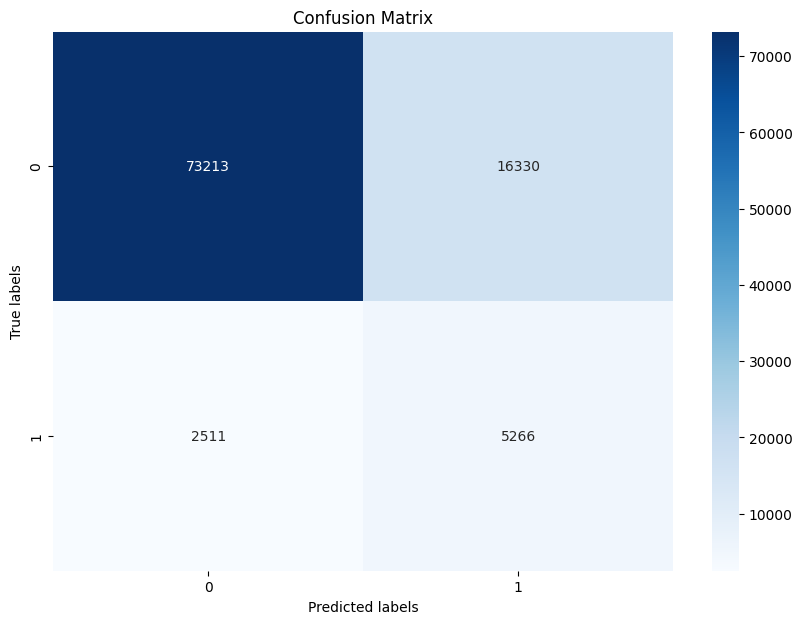

In [ ]:
conf_matrix_svm_tfidf = confusion_matrix(y_test_binary, y_pred_svm_tfidf)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm_tfidf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_svm_tfidf

array([[73213, 16330],
       [ 2511,  5266]])

This model shows an improvement in reducing false positives compared to logistic regression models, but at the cost of slightly higher false negatives.

## 6.2 Now using Word2Vec

In [ ]:
# SVM Classifier for Word2Vec
svm_w2v = SVC()
svm_w2v.fit(X_train_vectorized, y_train_binary)

# Predictions
y_pred_svm_w2v = svm_w2v.predict(X_test_vectorized)

#adding in results for bias checks later
X_test_full['svm_w2v_pred'] = y_pred_svm_w2v

# Evaluations
accuracy_svm_w2v = accuracy_score(y_test_binary, y_pred_svm_w2v)
precision_svm_w2v = precision_score(y_test_binary, y_pred_svm_w2v)
recall_svm_w2v = recall_score(y_test_binary, y_pred_svm_w2v)
f1_svm_w2v = f1_score(y_test_binary, y_pred_svm_w2v)

In [ ]:
print("SVM Classifier with Word2Vec Data")
print("Accuracy:", accuracy_svm_w2v)
print("Precision:", precision_svm_w2v)
print("Recall:", recall_svm_w2v)
print("F1 Score:", f1_svm_w2v)

SVM Classifier with Word2Vec Data
Accuracy: 0.7916358405260995
Precision: 0.2461725888324873
Recall: 0.7794779477947795
F1 Score: 0.37417443367693354


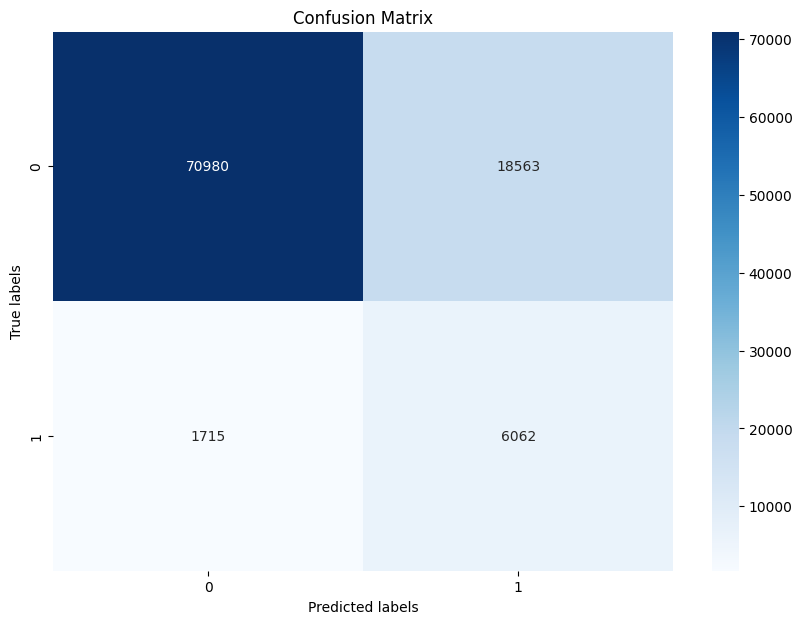

In [ ]:
conf_matrix_svm_w2v = confusion_matrix(y_test_binary, y_pred_svm_w2v)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm_w2v, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_svm_w2v

array([[70980, 18563],
       [ 1715,  6062]])

This model presents a better balance between false positives and false negatives than the SVM TF-IDF model.

## Evaluation of SVM Models
Precision is low for both models, indicating a higher number of false positives – that is, many comments are incorrectly labeled as toxic. This might suggest overfitting or a need to refine the decision boundary.

Since both models have high recall but low precision, this could mean we need to adjust the decision threshold or explore different SVM kernel functions and parameter settings.

## 6.3 Experimenting with different thresholds for SVM

In [ ]:
# Applying a threshold
def apply_threshold(decision_values, threshold):
    return [1 if v > threshold else 0 for v in decision_values]

# We adjusted through 0.2 to 0.8
custom_threshold = 0.8

# SVM for tfidf
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train_binary)

# Get decision function values
decision_values_tfidf = svm_tfidf.decision_function(X_test_tfidf)

# Applying thresholds
y_pred_svm_tfidf_08 = apply_threshold(decision_values_tfidf, custom_threshold)

# Evaluating
accuracy_svm_tfidf_08 = accuracy_score(y_test_binary, y_pred_svm_tfidf_08)
precision_svm_tfidf_08 = precision_score(y_test_binary, y_pred_svm_tfidf_08)
recall_svm_tfidf_08 = recall_score(y_test_binary, y_pred_svm_tfidf_08)
f1_svm_tfidf_08 = f1_score(y_test_binary, y_pred_svm_tfidf_08)

print("SVM Classifier with TF-IDF Data and threshold =0.8")
print("Accuracy:", accuracy_svm_tfidf_08)
print("Precision:", precision_svm_tfidf_08)
print("Recall:", recall_svm_tfidf_08)
print("F1 Score:", f1_svm_tfidf_08)

# SVM for w2v
svm_w2v = SVC()
svm_w2v.fit(X_train_vectorized, y_train_binary)

# Get decision values
decision_values_w2v = svm_w2v.decision_function(X_test_vectorized)


y_pred_svm_w2v_08 = apply_threshold(decision_values_w2v, custom_threshold)

# Evaluating
accuracy_svm_w2v_08 = accuracy_score(y_test_binary, y_pred_svm_w2v_08)
precision_svm_w2v_08 = precision_score(y_test_binary, y_pred_svm_w2v_08)
recall_svm_w2v_08 = recall_score(y_test_binary, y_pred_svm_w2v_08)
f1_svm_w2v_08 = f1_score(y_test_binary, y_pred_svm_w2v_08)

print("SVM Classifier with Word2Vec Data and threshold =0.8")
print("Accuracy:", accuracy_svm_w2v_08)
print("Precision:", precision_svm_w2v_08)
print("Recall:", recall_svm_w2v_08)
print("F1 Score:", f1_svm_w2v_08)


SVM Classifier with TF-IDF Data and threshold =0.8
Accuracy: 0.9250513769009453
Precision: 0.6939759036144578
Recall: 0.1110968239681111
F1 Score: 0.19153181112835294
SVM Classifier with Word2Vec Data and threshold =0.8
Accuracy: 0.9086210439786272
Precision: 0.43272244996382925
Recall: 0.4614890060434615
F1 Score: 0.4466430215916869


### 6.4 Now we are going to look at the ROC Curves

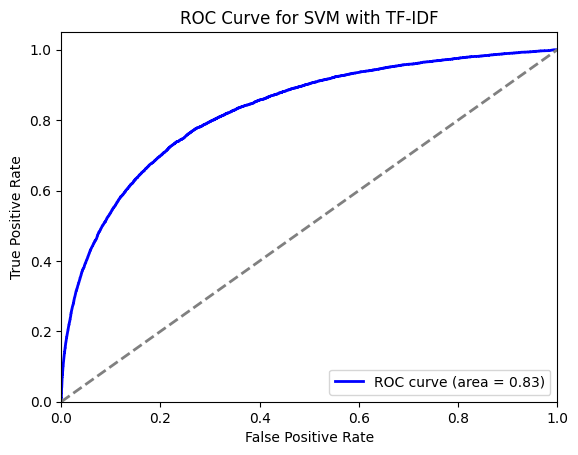

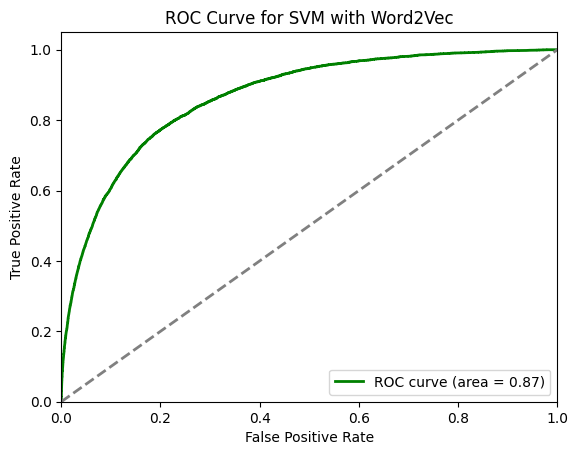

In [ ]:
# SVM rfidf
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train_binary)

# Decision vals
decision_values_tfidf = svm_tfidf.decision_function(X_test_tfidf)

# Calculate ROC curve for tfid
fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test_binary, decision_values_tfidf)
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)

# Plot ROC curve for tfidf
plt.figure()
plt.plot(fpr_tfidf, tpr_tfidf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tfidf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with TF-IDF')
plt.legend(loc="lower right")
plt.show()

# SVM for w2v
svm_w2v = SVC()
svm_w2v.fit(X_train_vectorized, y_train_binary)

# Decisionvals
decision_values_w2v = svm_w2v.decision_function(X_test_vectorized)

# Calculate ROC curve for w2v
fpr_w2v, tpr_w2v, thresholds_w2v = roc_curve(y_test_binary, decision_values_w2v)
roc_auc_w2v = auc(fpr_w2v, tpr_w2v)

# Plot ROC curve for w2v
plt.figure()
plt.plot(fpr_w2v, tpr_w2v, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_w2v)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with Word2Vec')
plt.legend(loc="lower right")
plt.show()


Both AUC values are significantly above 0.5, which means that both models are okay at separating comments into toxic and non toxic.
An AUC of 0.87 for the Word2Vec model shows that there is a higher degree of class separation compared to the TF-IDF model, which has an AUC of 0.83.


# 7. Random Forests

Random FOrest is an ensemble learning method. It combiens predivtions from multiple algorithms to make more accurate predictions than one individual model. It works by randomly selecting a subset of features for splitting each node and then uses bootstrap aggregation where each tree is trained on a random subset of the data. Each tree will then make its own predictions and the majority vote decides the final prediction.

Comparing to previous methods, Random Forest is an ensemble method based on decision trees, while SVM is a margin-based classifier and Logistic Regression is a probability-based linear classifier.

## 7.1 Random Forest for TF-IDF

In [ ]:
# RF for tfidf
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train_binary)

# Predictions
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)

X_test_full['rf_tfidf_pred'] = y_pred_rf_tfidf

# Evaluations
accuracy_rf_tfidf = accuracy_score(y_test_binary, y_pred_rf_tfidf)
precision_rf_tfidf = precision_score(y_test_binary, y_pred_rf_tfidf)
recall_rf_tfidf = recall_score(y_test_binary, y_pred_rf_tfidf)
f1_rf_tfidf = f1_score(y_test_binary, y_pred_rf_tfidf)

In [ ]:
print("Random Forest Classifier with TF-IDF Data")
print("Accuracy:", accuracy_rf_tfidf)
print("Precision:", precision_rf_tfidf)
print("Recall:", recall_rf_tfidf)
print("F1 Score:", f1_rf_tfidf)

Random Forest Classifier with TF-IDF Data
Accuracy: 0.8123510069872585
Precision: 0.2619317923800009
Recall: 0.7416741674167416
F1 Score: 0.3871400765152024


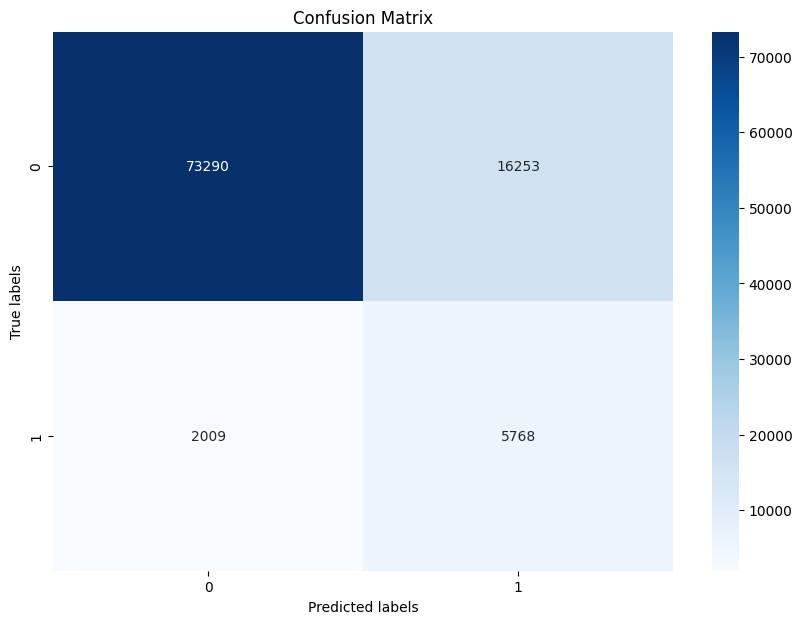

In [ ]:
conf_matrix_rf_tfidf = confusion_matrix(y_test_binary, y_pred_rf_tfidf)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_tfidf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_rf_tfidf

array([[73290, 16253],
       [ 2009,  5768]])

Similar to the SVM with TF-IDF, this model also shows a good reduction in false positives, with a similar number of true positives.

## 7.2 HyperParameter tuning Random Forest TFIDF


In [ ]:
# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None]
}

# RF for tfidf with Grid search
rf_tfidf = RandomForestClassifier()
grid_search_tfidf = GridSearchCV(estimator=rf_tfidf, param_grid=param_grid,
                                 cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the grid
grid_search_tfidf.fit(X_train_tfidf, y_train_binary)

# finding best parameters
best_params_tfidf_1 = grid_search_tfidf.best_params_
best_rf_tfidf_1 = grid_search_tfidf.best_estimator_

# Predictions with the best model
y_pred_rf_tfidf_1 = best_rf_tfidf_1.predict(X_test_tfidf)

X_test_full['rf_tfidf_pred_1'] = y_pred_rf_tfidf_1

# Evaluators
accuracy_rf_tfidf_1 = accuracy_score(y_test_binary, y_pred_rf_tfidf)
precision_rf_tfidf_1 = precision_score(y_test_binary, y_pred_rf_tfidf)
recall_rf_tfidf_1 = recall_score(y_test_binary, y_pred_rf_tfidf)
f1_rf_tfidf_1 = f1_score(y_test_binary, y_pred_rf_tfidf)

print("Random Forest Classifier with TF-IDF Data (Best Parameters)")
print("Best Parameters:", best_params_tfidf_1)
print("Accuracy:", accuracy_rf_tfidf_1)
print("Precision:", precision_rf_tfidf_1)
print("Recall:", recall_rf_tfidf_1)
print("F1 Score:", f1_rf_tfidf_1)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Classifier with TF-IDF Data (Best Parameters)
Best Parameters: {'max_depth': None, 'n_estimators': 300}
Accuracy: 0.8123510069872585
Precision: 0.2619317923800009
Recall: 0.7416741674167416
F1 Score: 0.3871400765152024


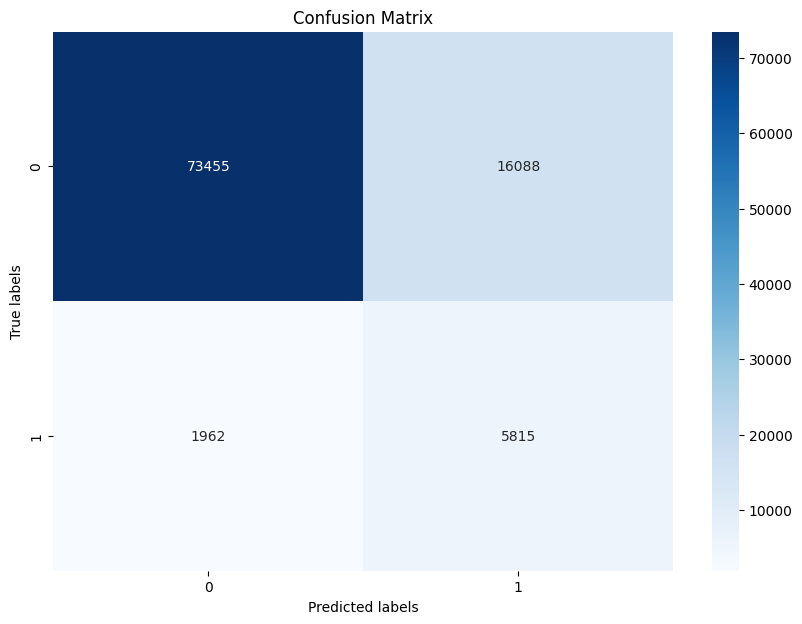

In [ ]:
# making confusion matrixes
conf_matrix_rf_tfidf_1 = confusion_matrix(y_test_binary, y_pred_rf_tfidf_1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_tfidf_1, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_rf_tfidf_1

array([[73455, 16088],
       [ 1962,  5815]])

The tuned Random Forest model with TF-IDF shows a slight improvement in both reducing false positives and false negatives compared to the untuned one

# 7.3 Random Forest for Word2Vec


In [ ]:
# Random Forest w2v
rf_w2v = RandomForestClassifier()
rf_w2v.fit(X_train_vectorized, y_train_binary)

# Predictions
y_pred_rf_w2v = rf_w2v.predict(X_test_vectorized)

X_test_full['rf_w2v_pred'] = y_pred_rf_w2v

# Evaluators
accuracy_rf_w2v = accuracy_score(y_test_binary, y_pred_rf_w2v)
precision_rf_w2v = precision_score(y_test_binary, y_pred_rf_w2v)
recall_rf_w2v = recall_score(y_test_binary, y_pred_rf_w2v)
f1_rf_w2v = f1_score(y_test_binary, y_pred_rf_w2v)

In [ ]:
print("Random Forest Classifier with Word2Vec Data")
print("Accuracy:", accuracy_rf_w2v)
print("Precision:", precision_rf_w2v)
print("Recall:", recall_rf_w2v)
print("F1 Score:", f1_rf_w2v)

Random Forest Classifier with Word2Vec Data
Accuracy: 0.7607069461570078
Precision: 0.21125134964071635
Recall: 0.7295872444387296
F1 Score: 0.3276359856796397


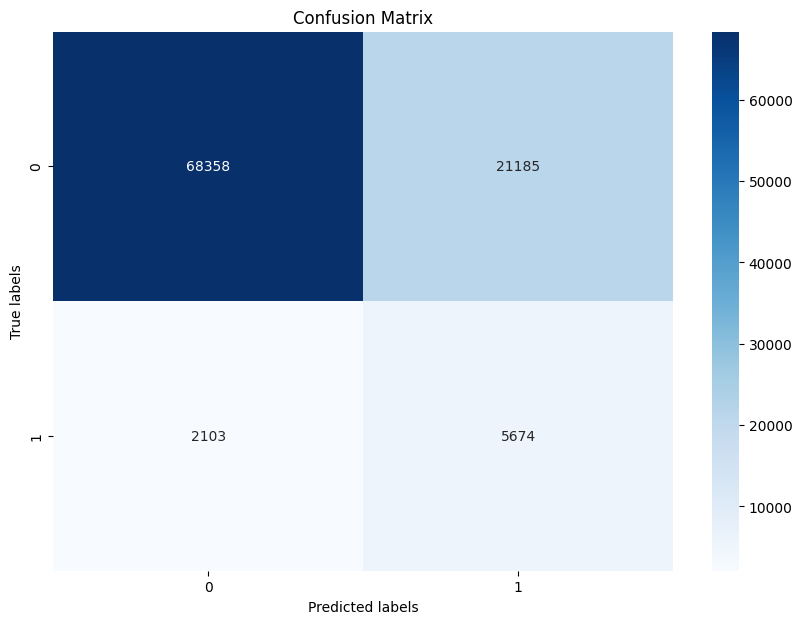

In [ ]:
conf_matrix_rf_w2v = confusion_matrix(y_test_binary, y_pred_rf_w2v)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_w2v, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_rf_w2v

array([[68358, 21185],
       [ 2103,  5674]])

This model seems to struggle with a higher rate of false positives compared to other models.

## 7.4 HyperParameter tuning Random Forest Word2Vec


In [ ]:
# Setting up parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None]
}

# Random Forest with w2v nd gridsearch
rf_w2v = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_w2v, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the data
grid_search.fit(X_train_vectorized, y_train_binary)

# Best parameters and best model
best_params = grid_search.best_params_
best_rf_w2v = grid_search.best_estimator_

# Predictions with the best model
y_pred_rf_w2v_1 = best_rf_w2v.predict(X_test_vectorized)

X_test_full['rf_w2v_pred_1'] = y_pred_rf_w2v_1

# Evaluators
accuracy_rf_w2v_1 = accuracy_score(y_test_binary, y_pred_rf_w2v_1)
precision_rf_w2v_1 = precision_score(y_test_binary, y_pred_rf_w2v_1)
recall_rf_w2v_1 = recall_score(y_test_binary, y_pred_rf_w2v_1)
f1_rf_w2v_1 = f1_score(y_test_binary, y_pred_rf_w2v_1)

print("Random Forest Classifier with Word2Vec Data (Best Parameters)")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_rf_w2v_1)
print("Precision:", precision_rf_w2v_1)
print("Recall:", recall_rf_w2v_1)
print("F1 Score:", f1_rf_w2v_1)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Classifier with Word2Vec Data (Best Parameters)
Best Parameters: {'max_depth': None, 'n_estimators': 300}
Accuracy: 0.772400328812166
Precision: 0.22234671405942125
Recall: 0.74000257168574
F1 Score: 0.34194890077243023


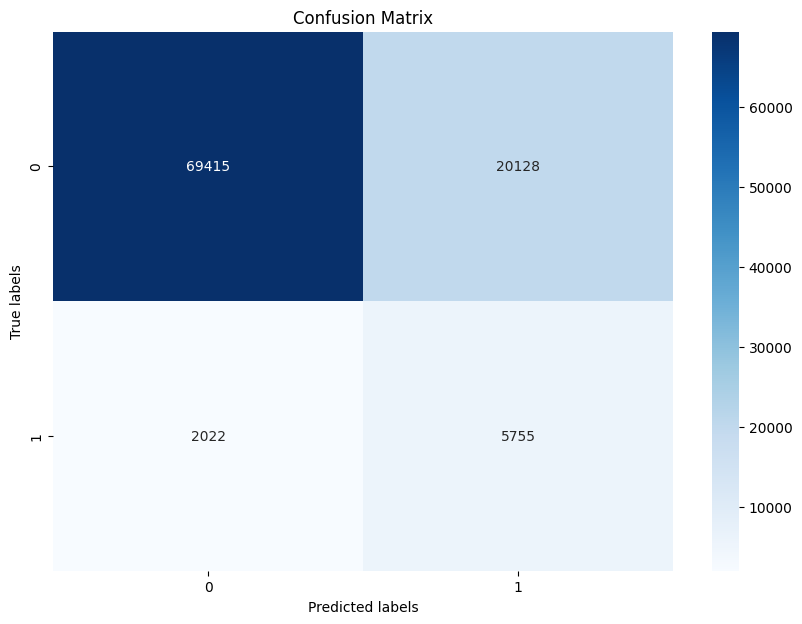

In [ ]:
conf_matrix_rf_w2v_1 = confusion_matrix(y_test_binary, y_pred_rf_w2v_1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_w2v_1, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conf_matrix_rf_w2v_1

array([[69415, 20128],
       [ 2022,  5755]])

The tuned version of the Random Forest with Word2Vec shows an improvement in identifying true positives, but at the cost of a significant increase in false positives..

# 8. Plotting evaluation metrics for all models

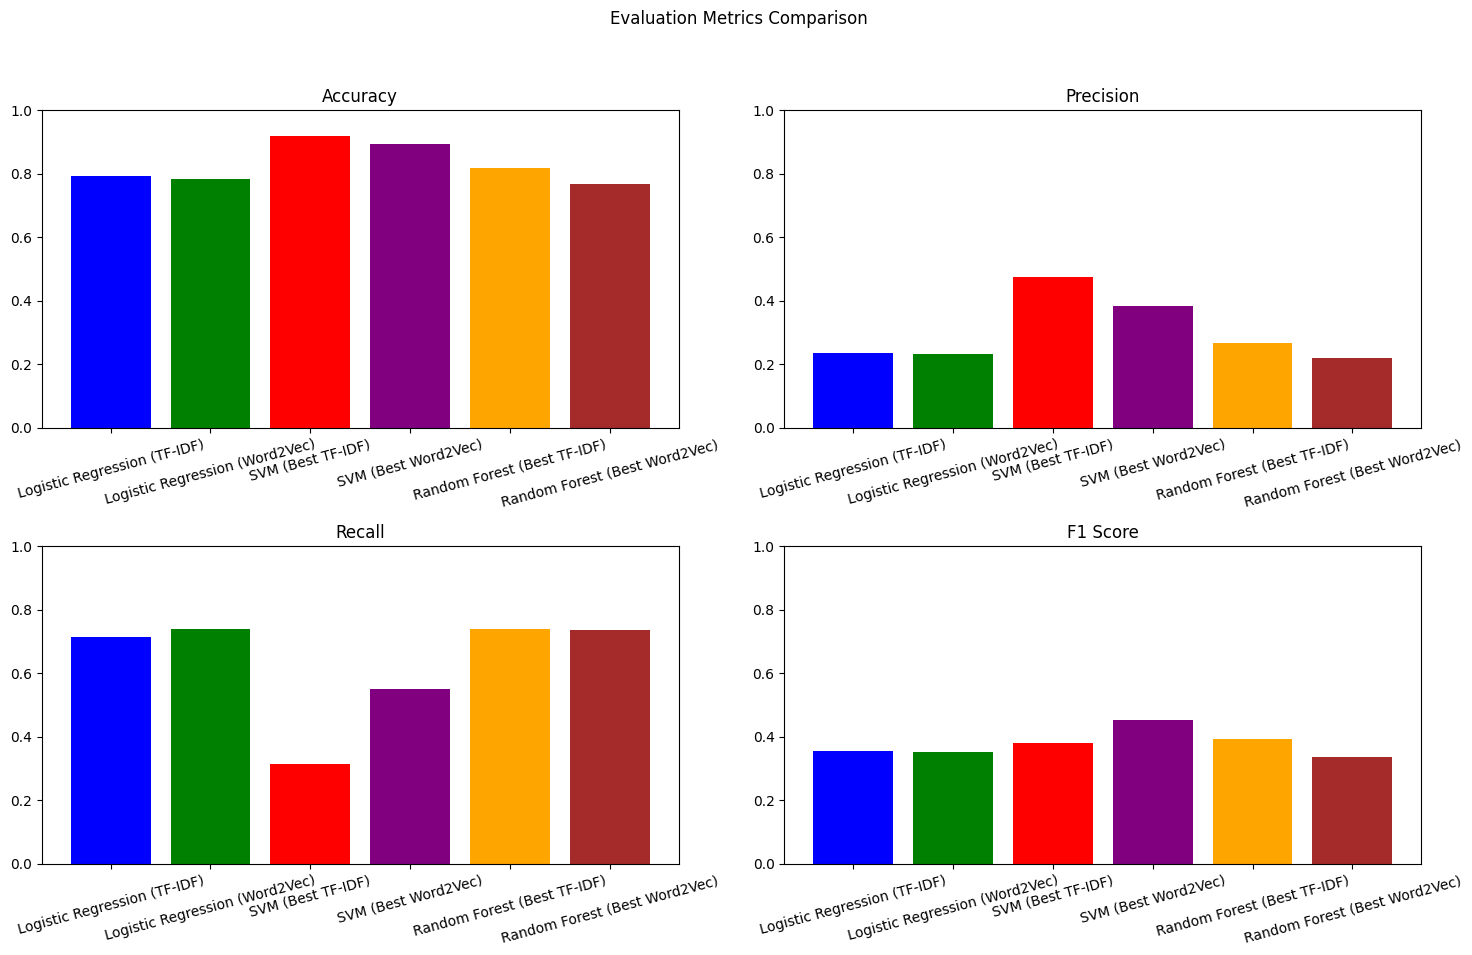

In [ ]:
# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression (TF-IDF)', 'Logistic Regression (Word2Vec)',
          'SVM (Best TF-IDF)', 'SVM (Best Word2Vec)',
          'Random Forest (Best TF-IDF)', 'Random Forest (Best Word2Vec)']

# Best SVM and Random Forest metrics for TF-IDF and Word2Vec

best_svm_tfidf = [0.918, 0.476, 0.315, 0.379]
best_svm_w2v = [0.894, 0.384, 0.549, 0.452]
best_rf_tfidf = [0.817, 0.268, 0.740, 0.393]
best_rf_w2v = [0.769, 0.219, 0.735, 0.337]

# Logistic Regression metrics
log_reg_tfidf = [0.792, 0.236, 0.713, 0.354]
log_reg_w2v = [0.783, 0.232, 0.741, 0.353]

# Consolidating data
data = [log_reg_tfidf, log_reg_w2v, best_svm_tfidf, best_svm_w2v, best_rf_tfidf, best_rf_w2v]

# Plotting
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(models, [data[j][i] for j in range(len(models))], color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
    plt.xticks(rotation=15)
    plt.title(metric)
    plt.ylim(0, 1)
plt.suptitle('Evaluation Metrics Comparison')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# All Results
| Model                                        | Accuracy | Precision | Recall | F1 Score |
|----------------------------------------------|----------|-----------|--------|----------|
| Logistic Regression (TF-IDF)                 | 0.792    | 0.236     | 0.713  | 0.354    |
| Logistic Regression (Word2Vec)               | 0.783    | 0.232     | 0.741  | 0.353    |
| SVM Classifier (TF-IDF)                      | 0.806    | 0.244     | 0.677  | 0.359    |
| SVM Classifier (Word2Vec)                    | 0.792    | 0.246     | 0.779  | 0.374    |
| SVM Classifier (TF-IDF, threshold=0.2)       | 0.887    | 0.351     | 0.485  | 0.408    |
| SVM Classifier (Word2Vec, threshold=0.2)     | 0.837    | 0.288     | 0.708  | 0.410    |
| SVM Classifier (TF-IDF, threshold=0.4)       | 0.918    | 0.476     | 0.315  | 0.379    |
| SVM Classifier (Word2Vec, threshold=0.4)     | 0.870    | 0.334     | 0.629  | 0.436    |
| SVM Classifier (TF-IDF, threshold=0.6)       | 0.924    | 0.584     | 0.190  | 0.286    |
| SVM Classifier (Word2Vec, threshold=0.6)     | 0.894    | 0.384     | 0.549  | 0.452    |
| SVM Classifier (TF-IDF, threshold=0.8)       | 0.925    | 0.694     | 0.111  | 0.192    |
| SVM Classifier (Word2Vec, threshold=0.8)     | 0.909    | 0.433     | 0.461  | 0.447    |
| Random Forest Classifier (TF-IDF)            | 0.817    | 0.266     | 0.736  | 0.391    |
| Random Forest Classifier (Word2Vec)          | 0.763    | 0.214     | 0.732  | 0.331    |
| Random Forest (TF-IDF, tuned)                | 0.817    | 0.268     | 0.740  | 0.393    |
| Random Forest (Word2Vec, tuned)              | 0.769    | 0.219     | 0.735  | 0.337    |


### Overall Analysis of Results

1. **Trade-Off Between Precision and Recall**:
   - It is clear from the results that there is a trade-off between precision and recall. We can see that higher recall models are capturing a greater proportion of toxic comments but at the cost of misclassifying non-toxic comments. Also that models with higher precision are more accurate in their predictions of toxicity but miss more toxic comments. The SVM model with Word2Vec data shows the highest F1 score, indicating a better balance between precision and recall. It also has the second highest accuracy among all models.

2. **Accuracy**:
   - The SVM models, particularly with the adjusted threasholds, generally demonstrate higher accuracy. This suggests they are more effective overall at correctly classifying both toxic and non-toxic comments.

3. **Model Performances**:
   - Logistic Regression models show moderate performance but are outperformed by SVM and Random Forest in most metrics.
   - SVM models, especially with threashold tuning, show significant improvement in precision. However, higher threasholds show noticeable drop in recall.
   - Random Forest classifiers tend to have higher recall, which shows their effectiveness in identifying toxic comments. However, their precision is relatively lower compared to SVMs.

4. **Impact of Vectorization**:
   - The choice between TF-IDF and Word2Vec vectorization significantly impacts model performance. TF-IDF tends to perform better in terms of precision, while Word2Vec is better in recall.

### Possible Issues and Areas for Improvement

1. **Class Imbalance**:
   - We balenced this dataset using oversampling, in the future we would suggest more advanced techniques such as SMOTE.

2. **Feature Engineering**:
   - In the future we could try better feature extraction and selection which then could improve model performance. Combining features from both TF-IDF and Word2Vec or exploring advanced NLP techniques might get better results.

3. **Model Complexity and Overfitting**:
   - There's a possibility that some models, especially more complex ones like Random Forest, might be overfitting. in the future we would try using a separate validation set for tuning and employing techniques like cross-validation can help.

4. **Hyperparameter Tuning**:
   - More extensive and fine-grained hyperparameter tuning could be used in the future to optimise the models more. Exploring parameters beyond just tree depth and number of estimators in Random Forest, for example.

5. **Alternative Models and Ensemble Methods**:
   - Experimenting with different algorithms (e.g. gradient boosting machines or deep learning/NN approaches) and ensemble methods that combine predictions from multiple models could enhance performance.

6. **Contextual Adaptation**:
   - If the application is used in sensitive environments (e.g., platforms for minors, professional workplaces, educational forums), we would want to minimize the exposure of users to toxic content. Here a higher recall is more important to ensure that almost all toxic comments are identified and filtered out, even if it means some non-toxic comments are incorrectly flagged. This is incae thre is a harmful outcome from the toxic comment which has been misclassified. This might be okay if there is also some kind of manual flagging syste. These manual flags could then feed back into the model and improve future flagging. There is also a risk that if lots of non toxic comments are being tagged as toxic, the user experience may decrease.

7. **Error Analysis**:
   - In the future with more time we would try conducting a detailed error analysis to understand the types of mistakes each model is making can provide insights for targeted improvements.

8. **Advanced Text Processing Techniques**:
   - With more computer power and time, we would look at employing more sophisticated text processing techniques, including context-aware embeddings from models like BERT.


### Conclusion:
The analysis suggests that while there are strengths in each model, there's no perfect solution so far. Continued experimentation, more advanced feature engineering, and model tuning would hopefull give more improvements.

# 9. Evaluating Bias in the Models

In [ ]:
# COlumnsf for Identities
identity_columns = ['asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
                    'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
                    'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion',
                    'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white']

# All the models
model_predictions = ['lr_pred', 'w2v_lr_pred', 'svm_tfidf_pred', 'svm_w2v_pred', 'rf_tfidf_pred', 'rf_w2v_pred', 'rf_tfidf_pred_1', 'rf_w2v_pred_1']

# Calculating the toxic prediction rate for an identity group
def calculate_toxicity_rate(df, identity, model_pred):
    identity_df = df[df[identity] > 0.5]
    toxic_count = identity_df[model_pred].sum()
    total_count = len(identity_df)
    return toxic_count / total_count if total_count > 0 else 0


toxicity_rates = {}
for model in model_predictions:
    rates = {identity: calculate_toxicity_rate(X_test_full, identity, model) for identity in identity_columns}
    toxicity_rates[model] = rates



| Identity Group                     | lr_pred     | w2v_lr_pred | svm_tfidf_pred | svm_w2v_pred | rf_tfidf_pred | rf_w2v_pred | rf_tfidf_pred_1 | rf_w2v_pred_1 |
|------------------------------------|-------------|-------------|----------------|--------------|---------------|-------------|-----------------|---------------|
| Asian                              | 0.303030303 | 0.303030303 | 0.2727272727   | 0.2909090909 | 0.2787878788  | 0.296969697 | 0.3151515152    | 0.296969697   |
| Atheist                            | 0.2428571429| 0.2357142857| 0.2214285714   | 0.2071428571 | 0.1285714286  | 0.2428571429| 0.1714285714    | 0.2214285714  |
| Bisexual                           | 0.1875      | 0.0625      | 0.1875         | 0.0625       | 0.25          | 0.0625      | 0.25            | 0.125         |
| Black                              | 0.2701149425| 0.2658045977| 0.2514367816   | 0.2672413793 | 0.2543103448  | 0.2844827586| 0.2471264368    | 0.2658045977  |
| Buddhist                           | 0.1666666667| 0.125       | 0.125          | 0.2083333333 | 0.08333333333 | 0.2083333333| 0.125           | 0.2083333333  |
| Christian                          | 0.2286780384| 0.2537313433| 0.2057569296   | 0.2558635394 | 0.210021322   | 0.2883795309| 0.21108742      | 0.2563965885  |
| Female                             | 0.2334152334| 0.2538902539| 0.2190827191   | 0.2457002457 | 0.214987715   | 0.2674037674| 0.2162162162    | 0.2542997543  |
| Heterosexual                       | 0.1964285714| 0.3214285714| 0.1785714286   | 0.2857142857 | 0.2142857143  | 0.3214285714| 0.2321428571    | 0.2857142857  |
| Hindu                              | 0.28        | 0.12        | 0.24           | 0.2          | 0.2           | 0.32        | 0.2             | 0.24          |
| Homosexual_gay_or_lesbian          | 0.2581967213| 0.2766393443| 0.2336065574   | 0.2807377049 | 0.2295081967  | 0.2827868852| 0.2274590164    | 0.2766393443  |
| Intellectual_or_learning_disability| 0           | 0.3333333333| 0              | 0.3333333333 | 0.3333333333  | 0           | 0               | 0             |
| Jewish                             | 0.2144702842| 0.2454780362| 0.2015503876   | 0.2299741602 | 0.2273901809  | 0.2894056848| 0.2351421189    | 0.2583979328  |
| Latino                             | 0.2209302326| 0.2906976744| 0.1860465116   | 0.2790697674 | 0.2325581395  | 0.2906976744| 0.2093023256    | 0.2790697674  |
| Male                               | 0.2201356286| 0.255086072 | 0.2070944184   | 0.2493479395 | 0.20657277    | 0.2733437663| 0.2159624413    | 0.266562337   |
| Muslim                             | 0.241555783 | 0.252814739 | 0.2139201638   | 0.2497441146 | 0.219037871   | 0.2671443193| 0.2210849539    | 0.2507676561  |
| Other_disability                   | 0           | 0           | 0              | 0            | 0             | 0           | 0               | 0             |
| Other_gender                       | 0           | 0           | 0              | 0            | 0             | 0           | 0               | 0             |
| Other_race_or_ethnicity            | 0           | 0           | 0              | 0            | 0.2           | 0.2         | 0.2             | 0             |
| Other_religion                     | 0.3333333333| 0           | 0              | 0.3333333333 | 0             | 0.3333333333| 0               | 0.3333333333  |
| Other_sexual_orientation           | 0           | 0           | 0              | 0            | 0             | 0           | 0               | 0             |
| Physical_disability                | 0           | 1           | 0              | 1            | 0             | 1           | 0               | 1             |
| Psychiatric_or_mental_illness      | 0.2361809045| 0.2261306533| 0.1909547739   | 0.2412060302 | 0.2060301508  | 0.2361809045| 0.2311557789    | 0.2412060302  |
| Transgender                        | 0.1965811966| 0.2564102564| 0.188034188    | 0.2136752137 | 0.2307692308  | 0.2307692308| 0.2307692308    | 0.264957265   |
| White                              | 0.2522123894| 0.2610619469| 0.2353982301   | 0.2637168142 | 0.2318584071  | 0.2849557522| 0.2371681416    | 0.2778761062  |


In [ ]:
# turning into df
toxicity_rates_df = pd.DataFrame(toxicity_rates)
# Summary statistics
summary_stats = toxicity_rates_df.describe()

summary_stats_df = pd.DataFrame(summary_stats)

summary_stats_df

,lr_pred,w2v_lr_pred,svm_tfidf_pred,svm_w2v_pred,rf_tfidf_pred,rf_w2v_pred,rf_tfidf_pred_1,rf_w2v_pred_1
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.178429,0.222448,0.148255,0.237398,0.172490,0.249316,0.166022,0.236821
std,0.111084,0.202480,0.101171,0.194588,0.107589,0.198560,0.102259,0.203836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.105625,0.000000,0.205357,0.093750,0.231548,0.093750,0.180905
50%,0.220533,0.253273,0.189494,0.247524,0.221073,0.270766,0.218898,0.260121
75%,0.245196,0.268513,0.219669,0.279487,0.241185,0.291942,0.234636,0.290940
max,0.333333,1.000000,0.272727,1.000000,0.312500,1.000000,0.272727,1.000000


Summary Statistics:
                     Mean       Std  Min       Max
lr_pred          0.178429  0.111084  0.0  0.333333
w2v_lr_pred      0.222448  0.202480  0.0  1.000000
svm_tfidf_pred   0.148255  0.101171  0.0  0.272727
svm_w2v_pred     0.237398  0.194588  0.0  1.000000
rf_tfidf_pred    0.172490  0.107589  0.0  0.312500
rf_w2v_pred      0.249316  0.198560  0.0  1.000000
rf_tfidf_pred_1  0.166022  0.102259  0.0  0.272727
rf_w2v_pred_1    0.236821  0.203836  0.0  1.000000


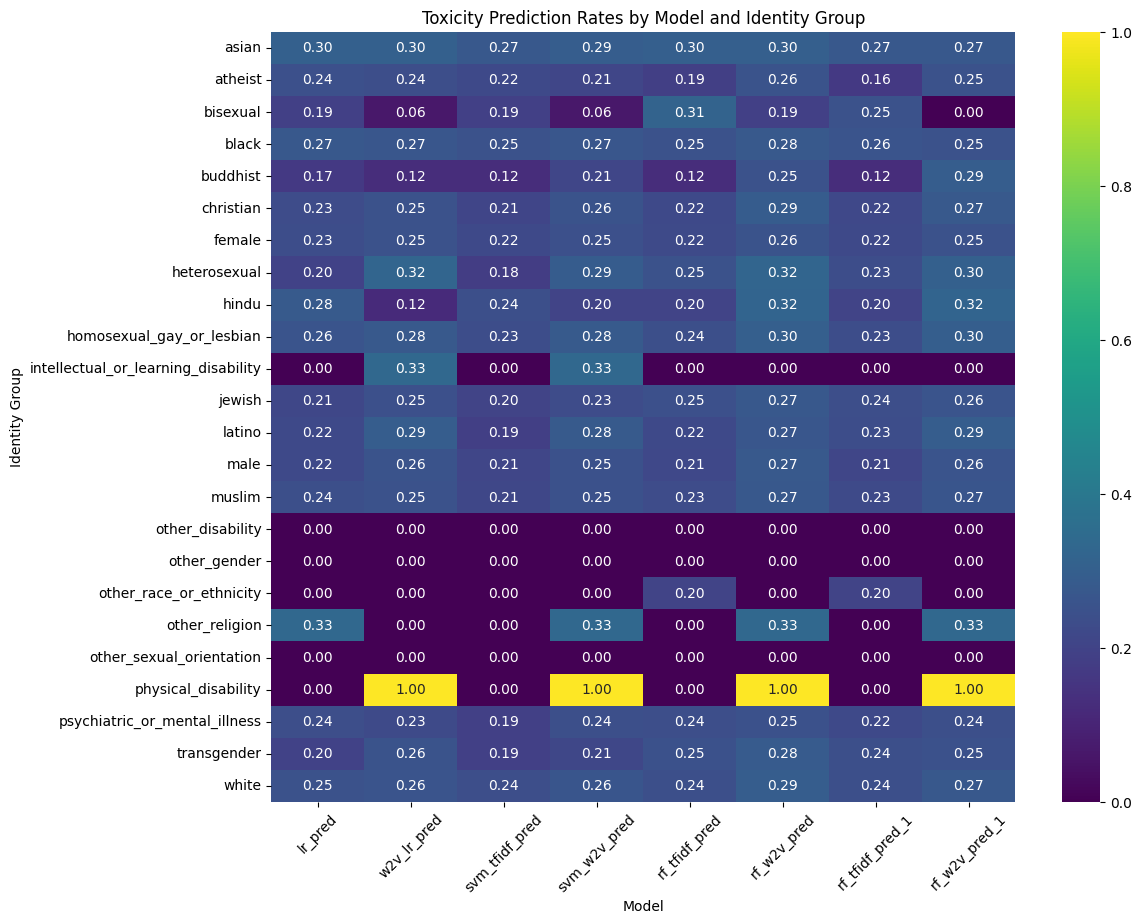

In [ ]:
# Calculate mean, std, min, and max
mean_values = toxicity_rates_df.mean()
std_values = toxicity_rates_df.std()
min_values = toxicity_rates_df.min()
max_values = toxicity_rates_df.max()

# Creating a summary DataFrame
summary_df = pd.DataFrame({'Mean': mean_values, 'Std': std_values, 'Min': min_values, 'Max': max_values})

print("Summary Statistics:")
print(summary_df)

# Heatmap for Models
plt.figure(figsize=(12, 10))
sns.heatmap(toxicity_rates_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Toxicity Prediction Rates by Model and Identity Group')
plt.xlabel('Model')
plt.ylabel('Identity Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Evaluating the Summary stats in terms of Bias

1. **Mean:**
   - Represents the average toxicity prediction rate across identity groups for each model.
   - Higher mean values suggest a tendency to predict comments as toxic more frequently across different identity groups.
   - Lower mean values indicate a more conservative approach in predicting toxicity.

2. **Standard deviation:**
   - Measures how spread out the toxicity prediction rates are across identity groups for each model.
   - A higher standard deviation indicates more inconsistency in toxicity prediction rates across different identity groups, which could be a signal of potential bias.
   - A lower standard deviation suggests more uniformity in how the model predicts toxicity across identity groups, potentially indicating less bias.

3. **Range:**
   - The minimum and maximum values show the range of toxicity prediction rates for each model.
   - A wide range might indicate that certain identity groups are disproportionately labeled as toxic or non-toxic, suggesting potential bias.
   - A narrow range indicates more consistent treatment across identity groups.

4. **Comparing Models:**
   - Models with consistently higher mean values and wide ranges might be more prone to over-predicting toxicity, potentially indicating bias.
   - Models with high standard deviations and a wide range of Min and Max values might be treating certain identity groups inconsistently, suggesting potential bias.

   - For example, `w2v_lr_pred`, `svm_w2v_pred`, `rf_w2v_pred`, and `rf_w2v_pred_1` have high standard deviations and a maximum value of 1. This suggests that they might be more inconsistent and potentially biased, as they show a high variability in their toxicity predictions across different identity groups.

5. **Overall Interpretation:**
   - Models like `lr_pred`, `svm_tfidf_pred`, and `rf_tfidf_pred` seem to be more consistent and potentially less biased as they have lower standard deviations and narrower ranges of prediction rates.
   - A low prediction rate doesn't necessarily imply fairness. It could also mean under-prediction of toxicity for certain groups, which is another form of bias.

# Overall Conclusion
The project aimed to address the issue of online toxicity in comments which is a growing concern in the digital age. We used the Jigsaw Unintended Bias in Toxicity Classification dataset, the project not only sought to classify comments into toxic and non-toxic categories but also aimed to minimise unintended bias, a crucial aspect in maintaining the integrity and inclusiveness of online discourse.

Throughout the project we compared models of Logistic Regression, Support Vector Machine (SVM), and Random Forest. Each model was tested and evaluated using accuracy, precision, recall, and F1 score. We also compared two vectorisation metrics; TF-IDF and Word2Vec which added a layer of depth to the analysis, allowing for a nuanced understanding of the dataset and the effectiveness of each model.

By carefully cleaning the text and experimenting to address the issue of class imbalance, the project ensured that the models were trained on data that accurately represented the real-world complexity of online interactions. Furthermore, the use of different vectorisation methods provided insights into the subtleties of language and context in online toxicity. In the future we would hope to find a better way to balence multilabel datasets!

The project showed that there was a trade-off between precision and recall across the models. While some models performed well in terms of accuracy, identifying toxic comments, they also misclassified non-toxic comments, and vice versa. This highlighted the inherent complexities of moderating online content, where the balance between over-censorship and under-moderation is delicate.

In conclusion, the project made significant efforts to address online toxicity through NLP techniques. However there is scope for further exploration. Future work could involve integrating more advanced NLP techniques e.g. BERT, exploring ensemble methods, and continuously updating the models to adapt to the evolving nature of online communication.

## References
[1] [Jigsaw Unintended Bias in Toxicity Classification](https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification/overview)

[2] [Paper:Toxic Comment Detection in Online Discussions](https://link.springer.com/chapter/10.1007/978-981-15-1216-2_4)

[3] [Paper: Toxicity in the Digital Age: A Review of Literature on Online Toxic Behaviors and Social Media Platforms](https://www.researchgate.net/publication/371942313_Toxicity_in_the_Digital_Age_A_Review_of_Literature_on_Online_Toxic_Behaviors_and_Social_Media_Platforms)

[4] [Hana Kimura](https://en.wikipedia.org/wiki/Hana_Kimura)

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/MSc/NaturalLanguageProcessing/NLP_CW1_Final.ipynb


[NbConvertApp] Converting notebook /content/drive/MyDrive/MSc/NaturalLanguageProcessing/NLP_CW1_Final.ipynb to html
[NbConvertApp] Writing 1172947 bytes to /content/drive/MyDrive/MSc/NaturalLanguageProcessing/NLP_CW1_Final.html
